**MSSV**: `19520925`   
**Họ tên**: `Phạm Ngọc Tân`   
**Bài tập**:    
- `Đọc, hiển thị ảnh `
- `Tính và hiển thị histogram`
- `Lấy ra top5 ảnh giống ảnh nhập vào`


# Section 1: Đọc và hiển thị ảnh 

In [32]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [33]:
import os
dir_monhoc = '/gdrive/MyDrive/CS231.L22.KHCL'

In [34]:
dir_baitap = os.path.join(dir_monhoc, 'SoSanh2Anh')

In [35]:
#Đọc ảnh lena.jpg và chuyển thành ảnh xám 
import cv2 as cv 
path_filename = os.path.join(dir_baitap, 'lena.jpg')
img = cv.imread(path_filename, 0)

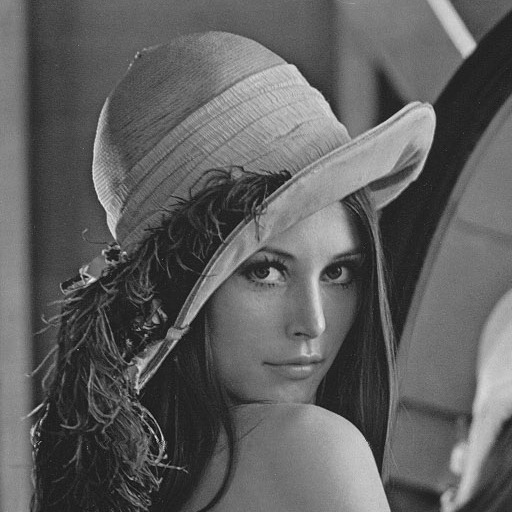

In [36]:
#Hiển thị ảnh 
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Section 2: Tính và hiển thị histogram

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Hàm tính Histogram 
def TinhHist(pathfilename):
    img = cv.imread(pathfilename, 0)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0] * img.shape[1]
    hist /= size
    return hist 

In [39]:
#Hàm return historgram 
def ShowHistogram(pathfilename):
    plt.plot(pathfilename)
    plt.xlim([0, 256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()

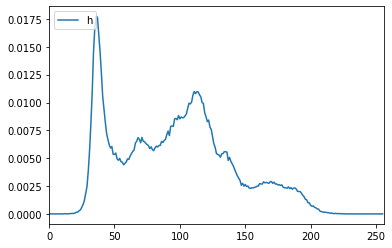

In [40]:
#Histogram của lena.jpg 
hist1 = TinhHist(path_filename)
ShowHistogram(hist1)

#Đọc, hiển thị ảnh và hiển thị histogram của ảnh thứ 2

In [41]:
#Lấy ảnh lena256.jpg 
path_filename2 = os.path.join(dir_baitap, 'lena256.jpg')
img2 = cv.imread(path_filename2, 0)

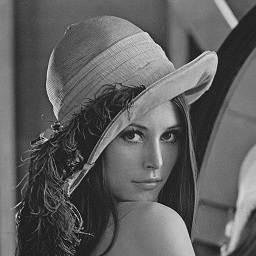

In [42]:
#show img2 
cv2_imshow(img2)

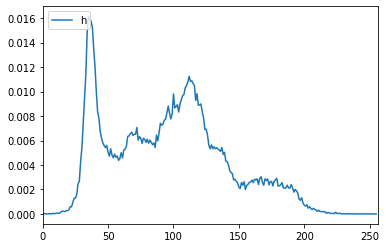

In [43]:
#Histogram của lena256.jpg 
hist2 = TinhHist(path_filename2)
ShowHistogram(hist2)

#Tính khoảng cách giữa 2 histogram

In [44]:
#So sánh khoảng cách giữa 2 histogram 
from scipy.spatial import distance 
dist = distance.euclidean(hist1, hist2)
dist

0.0065198298543691635

#Lấy ra top5 những ảnh giống ảnh nhập vào nhất 



In [45]:
#Load data from folder
dir_baitap2 = os.path.join(dir_monhoc, 'SoSanh2Anh')
baitap2 = os.path.join(dir_baitap2, 'Holiday50')

images = []
for filename in os.listdir(baitap2):
    img = cv.imread(os.path.join(baitap2,filename))
    if img is not None:
        images.append(os.path.join(baitap2,filename))

In [46]:
x = int(input())

12


In [47]:
#Create a histogram array for all images
histogram = []
for i in images:
    histogram.append(TinhHist(i))

In [48]:
def sort(arr):
    arr.sort(key = lambda x: x[0])
    return arr

In [49]:
#Distance array of one image with others
distance_array = []
for i in range(len(histogram)):
    dist = []
    for j in range(len(histogram)):
        dist.append((distance.euclidean(histogram[i], histogram[j]), j))
    dist = sort(dist)
    distance_array.append(dist)

In [50]:
answer = []
for i in range(5):
    image = cv.imread(images[distance_array[x][i][1]], 0)
    answer.append((image, images[distance_array[x][i][1]]))

In [54]:
image = cv.imread(images[x], 0)
cv2_imshow(image)

array([[27, 26, 24, ..., 65, 70, 75],
       [26, 25, 24, ..., 64, 68, 71],
       [26, 26, 25, ..., 65, 67, 69],
       ...,
       [34, 33, 32, ..., 37, 36, 37],
       [34, 33, 32, ..., 36, 38, 41],
       [37, 35, 34, ..., 38, 35, 34]], dtype=uint8)

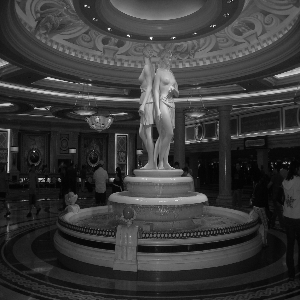

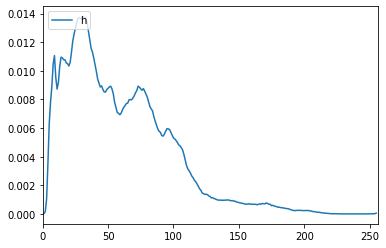

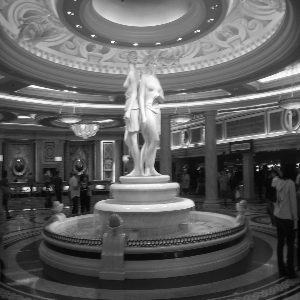

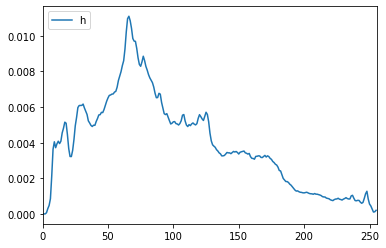

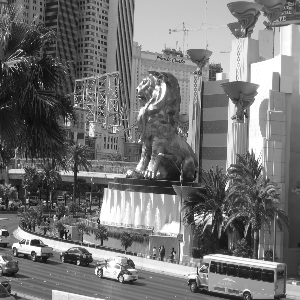

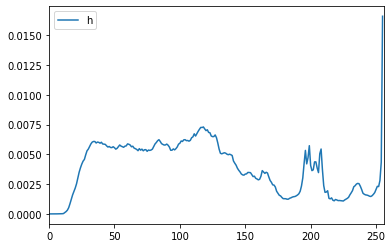

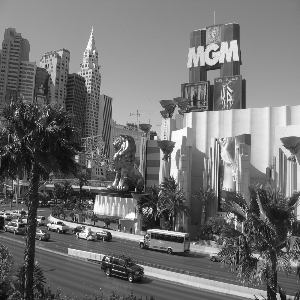

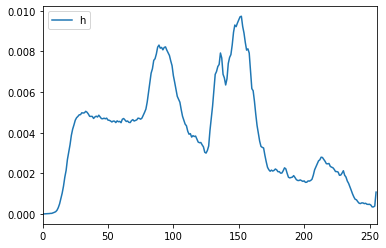

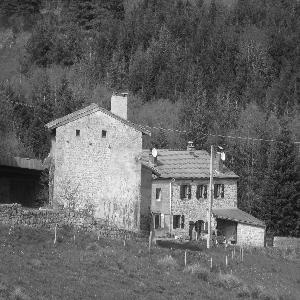

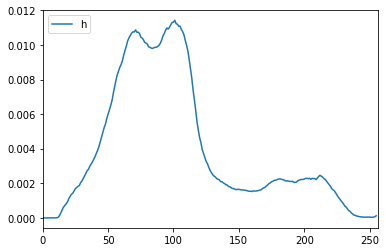

In [57]:
for i in range(5):  
    showimg = cv.resize(answer[i][0], (300, 300))
    cv2_imshow(showimg)
    ShowHistogram(TinhHist(answer[i][1]))